Create a **classifier** using either a shallow Neural Network (such as MLP with a single hidden layer) or a Deep Network.
The classifier can take as input some user generated data, e.g. a partition of the [0,1]x[0,1] square (x1 > x2^2).

Complete the code below where indicated

Use Keras docs as needed https://keras.io/api/


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import classification_report


Generate some data

In [15]:
from math import *
# Fixing random state for reproducibility
np.random.seed(123)

#try changing this
theFunction = lambda x1,x2 : x1>x2**2  #FILL HERE# Try using a different function, keep in mind x1 and x2 are numpy arrays!

N=3000
x1 = 1.0 * np.random.rand(N)
x2 = 1.0 * np.random.rand(N)
y=theFunction(x1,x2)

print(x1[:10])
print(x2[:10])
X = np.stack((x1, x2),axis=1) #FILL HERE# create a matrix with two columns one with data from x1, the other from x2

#FILL HERE# print the first 10 entries of X and y and X shape
print(X[:10])
print(y[:10])
print(X.shape)
print(y.shape)

False
[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752]
[0.96942611 0.72178369 0.18189166 0.88202837 0.47702151 0.84685675
 0.83090753 0.01735057 0.23366189 0.91109161]
[[0.69646919 0.96942611]
 [0.28613933 0.72178369]
 [0.22685145 0.18189166]
 [0.55131477 0.88202837]
 [0.71946897 0.47702151]
 [0.42310646 0.84685675]
 [0.9807642  0.83090753]
 [0.68482974 0.01735057]
 [0.4809319  0.23366189]
 [0.39211752 0.91109161]]
[False False  True False  True False  True  True  True False]
(3000, 2)
(3000,)


Now let's look  at the data we generated, does it look like you expect?


<ipython-input-21-cf29c3bda803>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1_vals, x2_vals, 'k-', label=r'$x_1 = x_2^2$', color = 'limegreen')


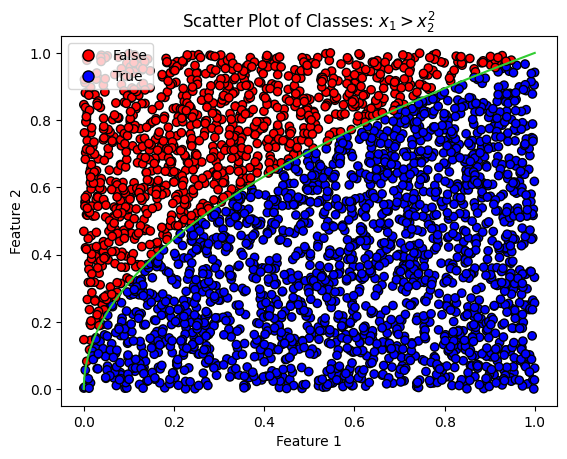

In [21]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
x2_vals = np.linspace(min(X[:, 1]), max(X[:, 1]), 300)
x1_vals = x2_vals**2
plt.plot(x1_vals, x2_vals, 'k-', label=r'$x_1 = x_2^2$', color = 'limegreen')
handles = []
labels = [False, True]
for i, color in enumerate(['#FF0000', '#0000FF']):
    handles.append(plt.Line2D([], [], marker='o', color='w', markerfacecolor=color,
                              markeredgecolor='k', markersize=8, linestyle='None'))
    labels.append(f'Class {i}')
plt.legend(handles, labels)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(r'Scatter Plot of Classes: $x_1 > x_2^2$')
plt.show()

Let's compare with a colormap made using directly the generating function (remember, in real case world we will not know such function)

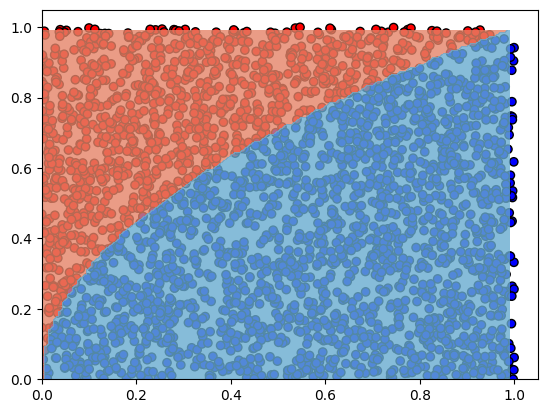

In [22]:
xx1, xx2 = np.meshgrid(np.arange(0, 1, 0.01),np.arange(0, 1, 0.01))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.contourf(xx1, xx2, (theFunction(xx1,xx2)).reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)

First let's try to create a shallow network (an MLP with one hidden layer with 100 to 500 neurons (pick a number)

In [27]:
inputs=Input(shape=(2,)) #FILL THE DOTS# what is the shape that our input data has?
hidden=Dense(500,activation="relu")(inputs) #FILL HERE# create a new Dense layer with XXX nodes taking "inputs" as input , what is the most appropriate activation?
outputs = Dense(1, activation='sigmoid')(hidden) #FILL THE DOTS# what is the most appropriate activation for the final node of a classifier?
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

#FILL HERE# print the model structure, it should look like
#Layer (type)                 Output Shape              Param #
#=================================================================
#input_1 (InputLayer)         [(None, 2)]               0
#_________________________________________________________________
#dense (Dense)                (None, 500)               1500
#_________________________________________________________________
#dense_1 (Dense)              (None, 1)                 501
#=================================================================

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

Split the dataset in training+validation and test, then train it




In [36]:
history=model.fit(X,y,validation_split=0.5,epochs=200,verbose=1,batch_size=32) #FILL THE DOTS# What is the name of the keras function to train a model




Epoch 1/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - val_loss: 0.0216
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215 - val_loss: 0.0223
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0251 - val_loss: 0.0243
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - val_loss: 0.0216
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0201 - val_loss: 0.0218
Epoch 6/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - val_loss: 0.0222
Epoch 7/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - val_loss: 0.0218
Epoch 8/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0214 - val_loss: 0.0252
Epoch 9/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0284 - val_loss: 0.0218
Epoch 10/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0317 - val_loss: 0.0216
Epoch 11/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - val_loss: 0.0272
Epoch 12/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

In the history object a history.history dictionary contains the validation and training loss vs epoch, let's try to plot them and compare to evaluate the training

dict_keys(['loss', 'val_loss'])
[0.025104070082306862, 0.025280650705099106, 0.025522518903017044, 0.029782185330986977, 0.02397892065346241, 0.023367904126644135, 0.02391444891691208, 0.022956306114792824, 0.02548031136393547, 0.025676650926470757, 0.022877514362335205, 0.02327745035290718, 0.024464985355734825, 0.022427622228860855, 0.023478208109736443, 0.023199694231152534, 0.024810582399368286, 0.023411620408296585, 0.02286578342318535, 0.023114345967769623, 0.026708288118243217, 0.022387275472283363, 0.023260686546564102, 0.023779449984431267, 0.022690480574965477, 0.02646968513727188, 0.02575368992984295, 0.022836362943053246, 0.026933547109365463, 0.027505382895469666, 0.022952085360884666, 0.022541489452123642, 0.02217056229710579, 0.023054366931319237, 0.022662602365016937, 0.02233201637864113, 0.023055410012602806, 0.02367563359439373, 0.02260490134358406, 0.02308262139558792, 0.02276848815381527, 0.022061381489038467, 0.023845992982387543, 0.024141978472471237, 0.0224526207

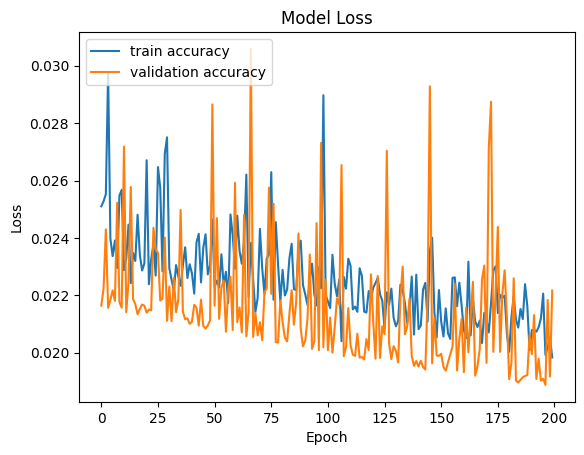

In [37]:
print(history.history.keys())
print(history.history['loss'])

plt.plot(history.history['loss'], label='train accuracy')
plt.plot(history.history['val_loss'], label='validation accuracy')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


#FILL HERE#  use plt.plot() and plt.show() to make a plot with training vs validation loss as function of the epoch
#plt.plot(...)
#plt.plot(...)
#plt.show()
#...



Now let's try to evaluate our model on the xx1,xx2 points we created earlier)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


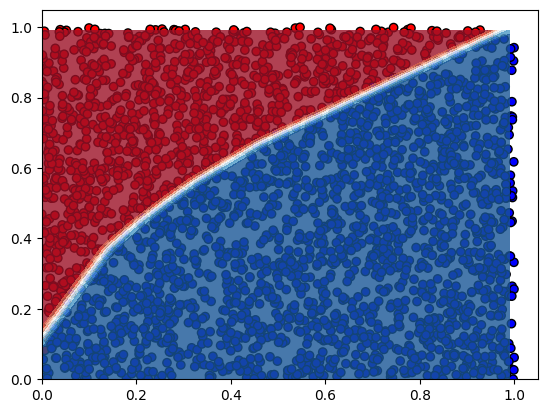

In [49]:

testSet=np.stack((xx1.flatten(), xx2.flatten()), axis=-1)
pred=model.predict(testSet) #FILL THE DOTS# what is the keras function used to evaluate?
val_preds = np.round(pred)
print(val_preds)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.contourf(xx1, xx2, pred.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)

Now let's try to create a deep network instead with about the same number of parameters as the MLP above. Let's try with 4 hidden layers, how many nodes per layers are needed?

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 12)             │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 517 (2.02 KB)

 Trainable params: 517 (2.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.6995 - val_loss: 0.6407
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6208 - val_loss: 0.5170
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4745 - val_loss: 0.3046
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2563 - val_loss: 0.1612
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1429 - val_loss: 0.1124
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1080 - val_loss: 0.0958
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0949 - val_loss: 0.0952
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1007 - val_loss: 0.0820
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0896 - val_loss: 0.0853
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0832 - val_loss: 0.0792


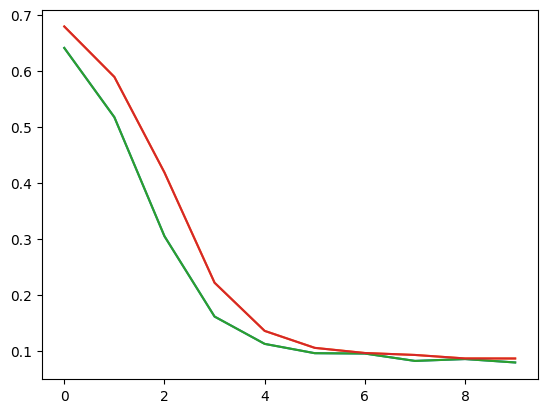

In [53]:

inputs=Input(shape=(2,))
#FILL HERE# add 4 dense hidden layers
#...
#...
hidden = Dense(12, activation='relu')(inputs)
hidden = Dense(12, activation='relu')(hidden)
hidden = Dense(12, activation='relu')(hidden)
hidden = Dense(12, activation='relu')(hidden)
outputs = Dense(1, activation='sigmoid')(hidden)

deepmodel = Model(inputs=inputs, outputs=outputs)
deepmodel.compile(loss='binary_crossentropy', optimizer='adam')
deepmodel.summary()
deephistory=deepmodel.fit(X,y,validation_split=0.5,epochs=10,verbose=1) #CHANGE HERE# Trying increasing number of epochs and changing batch size

plt.plot(deephistory.history["val_loss"])
plt.plot(deephistory.history["loss"])
plt.plot(deephistory.history["val_loss"])
plt.plot(deephistory.history["loss"])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


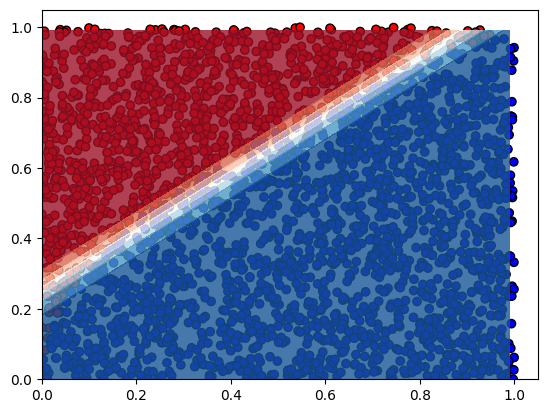

In [54]:

testSet=np.stack((xx1.flatten(), xx2.flatten()), axis=-1)
pred=deepmodel.predict(testSet)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.contourf(xx1, xx2, pred.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)